In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4220,4644-OBGFZ,Male,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,1026.35,No
2786,6584-VQMYT,Male,0,No,Yes,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,56.20,1567.55,No
1234,4525-VZCZG,Male,0,No,Yes,54,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,105.85,5826.65,No
991,8361-LBRDI,Female,0,No,No,58,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.35,1423.85,No
4938,6413-XKKPU,Male,0,Yes,Yes,17,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,1539.45,Yes


In [4]:
df.drop('customerID', axis='columns', inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [9]:
pd.to_numeric(df.TotalCharges, errors='coerce')  # errors='coerce' means the to_numeric function will ignore the errors and change the other values to numeric.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() # isnull will tell you of the row is null or not.

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [13]:
df.shape

(7043, 20)

In [14]:
df.iloc[488] # Similar to Array Indexing

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [15]:
df.iloc[488]['TotalCharges']

' '

In [16]:
df.iloc[488]['PaperlessBilling']

'Yes'

In [17]:
dfNew=df[df['TotalCharges']!=' ']
dfNew.shape

(7032, 20)

In [18]:
dfNew.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [19]:
dfNew['TotalCharges']=pd.to_numeric(dfNew['TotalCharges'])

<ipython-input-19-8d7d4ed7835d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['TotalCharges']=pd.to_numeric(dfNew['TotalCharges'])


In [20]:
dfNew['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [21]:
dfNew.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [22]:
dfNew[dfNew['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [23]:
dfNew[dfNew['Churn'] == 'No'].tenure

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

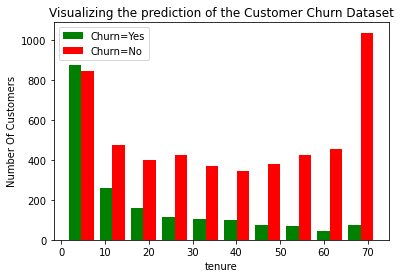

In [24]:
tenure_churn_no=dfNew[dfNew['Churn']== 'No'].tenure
tenure_churn_yes=dfNew[dfNew['Churn']== 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number Of Customers')
plt.title('Visualizing the prediction of the Customer Churn Dataset')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [25]:
for column in df:
    print(f'{column} : {df[column].unique()} ')

gender : ['Female' 'Male'] 
SeniorCitizen : [0 1] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
MonthlyCharges : [29.85 56.95 53.

In [26]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
             print(f'{column} : {df[column].unique()} ')

In [27]:
print_unique_col_values(dfNew)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No phone service' 'No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes' 'No internet service'] 
OnlineBackup : ['Yes' 'No' 'No internet service'] 
DeviceProtection : ['No' 'Yes' 'No internet service'] 
TechSupport : ['No' 'Yes' 'No internet service'] 
StreamingTV : ['No' 'Yes' 'No internet service'] 
StreamingMovies : ['No' 'Yes' 'No internet service'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [28]:
dfNew.replace('No phone service', 'No', inplace=True)
dfNew.replace('No internet service', 'No', inplace=True)

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [29]:
print_unique_col_values(dfNew)

gender : ['Female' 'Male'] 
Partner : ['Yes' 'No'] 
Dependents : ['No' 'Yes'] 
PhoneService : ['No' 'Yes'] 
MultipleLines : ['No' 'Yes'] 
InternetService : ['DSL' 'Fiber optic' 'No'] 
OnlineSecurity : ['No' 'Yes'] 
OnlineBackup : ['Yes' 'No'] 
DeviceProtection : ['No' 'Yes'] 
TechSupport : ['No' 'Yes'] 
StreamingTV : ['No' 'Yes'] 
StreamingMovies : ['No' 'Yes'] 
Contract : ['Month-to-month' 'One year' 'Two year'] 
PaperlessBilling : ['Yes' 'No'] 
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 
Churn : ['No' 'Yes'] 


In [30]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    dfNew[col].replace({'Yes': 1,'No': 0},inplace=True) #We can pass a dictionary to the 'replace' function as well.

C:\Users\argha\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [31]:
for col in dfNew:
    print(f'{col} : {dfNew[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [32]:
 dfNew['gender'].replace({'Female': 1,'Male': 0},inplace=True)

In [33]:
dfNew['gender'].unique()

array([1, 0], dtype=int64)

In [34]:
dfNew2=pd.get_dummies(data=dfNew, columns=['InternetService','Contract','PaymentMethod'])
dfNew2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [35]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
dfNew2.shape

(7032, 27)

In [37]:
dfNew2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [38]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

dfNew2[cols_to_scale]=scaler.fit_transform(dfNew2[cols_to_scale])

In [39]:
dfNew2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
for col in dfNew2:
    print(f'{col} : {dfNew2[col].unique()}')
    

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

In [41]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [42]:
X.shape

(7032, 26)

In [43]:
y.shape

(7032,)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=5)

In [46]:
X_train.shape

(4922, 26)

In [47]:
y_train.shape

(4922,)

In [48]:
len(X_train.columns)

26

In [49]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
154/154 [==============================] - 2s 4ms/step - loss: 0.5051 - accuracy: 0.7440
Epoch 2/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4258 - accuracy: 0.7958
Epoch 3/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4176 - accuracy: 0.8023
Epoch 4/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4130 - accuracy: 0.8072
Epoch 5/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4096 - accuracy: 0.8060
Epoch 6/50
154/154 [==============================] - 1s 5ms/step - loss: 0.4069 - accuracy: 0.8111
Epoch 7/50
154/154 [==============================] - 1s 6ms/step - loss: 0.4050 - accuracy: 0.8102
Epoch 8/50
154/154 [==============================] - 2s 10ms/step - loss: 0.4034 - accuracy: 0.8108
Epoch 9/50
154/154 [==============================] - 2s 10ms/step - loss: 0.4002 - accuracy: 0.8131
Epoch 10/50
154/154 [==============================] - 2s 10ms/step - loss: 0.3988 - accuracy: 0.8

In [50]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 1s 9ms/step - loss: 0.4826 - accuracy: 0.7668


[0.4825651943683624, 0.7668246626853943]

In [51]:
yp=model.predict(X_test)

In [52]:
yp[:5][0]

array([0.21104236], dtype=float32)

In [53]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
1042    0
3913    0
3397    0
3292    0
4605    0
Name: Churn, Length: 2110, dtype: int64

In [54]:
y_pred=[]
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [55]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [56]:
yp[:5]

array([[0.21104236],
       [0.41097793],
       [0.00493948],
       [0.8889766 ],
       [0.5730807 ]], dtype=float32)

In [57]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [58]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1511
           1       0.60      0.53      0.56       599

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.76      0.77      0.76      2110



Text(69.0, 0.5, 'Truth')

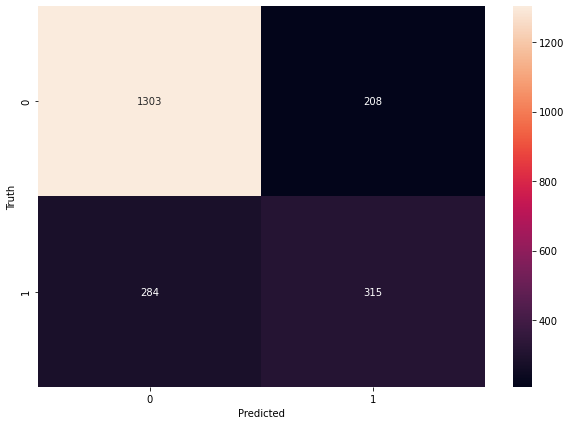

In [59]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Accuracy

In [60]:
round((1334+305)/(1334+177+294+305),2)

0.78

## Precision For 0 class i.e Precision for customers who did not churn

In [61]:
round(1334/(1334+294),2)

0.82

## Precision For 1 class i.e Precision for customers who actually churned

In [62]:
round(305/(305+177),2)

0.63

## Recall for 0 class. Recall is your total Truth

In [63]:
 round(1334/(1334+177),2)

0.88

In [64]:
round(305/(305+177),2)

0.63

# Handling Imbalanced Dataset

## 1) Undersampling

In [65]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),   # This creates the input layer as well as a hidden layer as we are not using the 'keras flatten' functionality.
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1, activation='sigmoid'),
        
    ])
    
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100, class_weight=weights)
        
    print(model.evaluate(X_test,y_test))
    
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)
    
    print('Classification Report\n', classification_report(y_test,y_preds))
    
    return y_preds

In [66]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
154/154 [==============================] - 3s 11ms/step - loss: 0.5122 - accuracy: 0.7458
Epoch 2/100
154/154 [==============================] - 1s 7ms/step - loss: 0.4234 - accuracy: 0.7970
Epoch 3/100
154/154 [==============================] - 1s 7ms/step - loss: 0.4153 - accuracy: 0.8058
Epoch 4/100
154/154 [==============================] - 2s 10ms/step - loss: 0.4129 - accuracy: 0.8056
Epoch 5/100
154/154 [==============================] - 2s 10ms/step - loss: 0.4103 - accuracy: 0.8039
Epoch 6/100
154/154 [==============================] - 1s 9ms/step - loss: 0.4082 - accuracy: 0.8076
Epoch 7/100
154/154 [==============================] - 1s 9ms/step - loss: 0.4073 - accuracy: 0.8088
Epoch 8/100
154/154 [==============================] - 2s 13ms/step - loss: 0.4054 - accuracy: 0.8115
Epoch 9/100
154/154 [==============================] - 3s 17ms/step - loss: 0.4046 - accuracy: 0.8119
Epoch 10/100
154/154 [==============================] - 2s 15ms/step - loss: 0.4032 - 

154/154 [==============================] - 2s 10ms/step - loss: 0.3534 - accuracy: 0.8413
Epoch 81/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3538 - accuracy: 0.8397
Epoch 82/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3522 - accuracy: 0.8411
Epoch 83/100
154/154 [==============================] - 2s 12ms/step - loss: 0.3528 - accuracy: 0.8405
Epoch 84/100
154/154 [==============================] - ETA: 0s - loss: 0.3534 - accuracy: 0.84 - 2s 11ms/step - loss: 0.3526 - accuracy: 0.8409
Epoch 85/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3504 - accuracy: 0.8421
Epoch 86/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3503 - accuracy: 0.8427
Epoch 87/100
154/154 [==============================] - 2s 11ms/step - loss: 0.3501 - accuracy: 0.8415
Epoch 88/100
154/154 [==============================] - 2s 10ms/step - loss: 0.3482 - accuracy: 0.8425
Epoch 89/100
154/154 [======================

In [102]:
#Count of the Classes
count_class0, count_class1=dfNew2.Churn.value_counts()

In [103]:
count_class0, count_class1

(5163, 1869)

In [104]:
df_class0=dfNew2[dfNew2['Churn'] == 0]
df_class1=dfNew2[dfNew2['Churn'] == 1]

In [105]:
dfNew2.shape

(7032, 27)

In [106]:
df_class0.shape

(5163, 27)

In [107]:
df.shape

(7043, 20)

In [108]:
df_class1.shape

(1869, 27)

In [109]:
df_class0.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5915,0,0,0,0,0.957746,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3986,0,0,1,0,0.915493,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,1
1719,0,0,0,0,0.028169,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6191,1,1,0,0,0.577465,1,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1300,0,0,1,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,1,0,0


In [110]:
df_class1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5651,1,0,1,0,0.577465,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3029,0,0,1,1,0.309859,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
6999,0,0,0,0,0.028169,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
6277,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3332,0,0,0,0,0.000000,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [111]:
df_class0.shape

(5163, 27)

In [112]:
df_class1.shape

(1869, 27)

In [113]:
df_class0.sample(count_class1).shape

(1869, 27)

In [114]:
df_class0_under=df_class0.sample(count_class1)

df_test_under=pd.concat([df_class0_under,df_class1], axis=0)
df_test_under.shape

(3738, 27)

In [115]:
print(df_test_under.Churn.value_counts())

0    1869
1    1869
Name: Churn, dtype: int64


In [116]:
X=df_test_under.drop('Churn', axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y) # 'stratify' will make sure that it has balanced samples as it as class0 values and class1 values. It makes sure that same amount of values are present from both the class in the training and the test samples for balanced training of the model.

In [117]:
y_train.value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [118]:
y_test.value_counts()

0    561
1    561
Name: Churn, dtype: int64

In [119]:
y_preds=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 1s 7ms/step - loss: 0.6804 - accuracy: 0.5990
Epoch 2/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5603 - accuracy: 0.7439
Epoch 3/100
82/82 [==============================] - 1s 6ms/step - loss: 0.5222 - accuracy: 0.7508
Epoch 4/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5109 - accuracy: 0.7546
Epoch 5/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5026 - accuracy: 0.7546: 0s - loss: 0.5271 - 
Epoch 6/100
82/82 [==============================] - 1s 7ms/step - loss: 0.4999 - accuracy: 0.7534
Epoch 7/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4970 - accuracy: 0.7554
Epoch 8/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4960 - accuracy: 0.7557
Epoch 9/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4927 - accuracy: 0.7557
Epoch 10/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4915 - 

82/82 [==============================] - 1s 11ms/step - loss: 0.4157 - accuracy: 0.8138
Epoch 82/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4147 - accuracy: 0.8112
Epoch 83/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4134 - accuracy: 0.8115
Epoch 84/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4128 - accuracy: 0.8123
Epoch 85/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4123 - accuracy: 0.8135
Epoch 86/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4089 - accuracy: 0.8127
Epoch 87/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4101 - accuracy: 0.8150
Epoch 88/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4098 - accuracy: 0.8119
Epoch 89/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4076 - accuracy: 0.8119
Epoch 90/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4066 - accuracy: 0.8142
Epo

## 2) Oversampling

In [120]:
count_class0, count_class1

(5163, 1869)

In [121]:
count_class0, count_class1

(5163, 1869)

In [122]:
df_class1_over=df_class1.sample(count_class0, replace=True)
df_class1_over.shape

(5163, 27)

In [123]:
df_test_over=pd.concat([df_class1_over,df_class0], axis=0)

df_test_over['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [125]:
X=df_test_under.drop('Churn', axis='columns')
y=df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [126]:
y_train.value_counts()

0    1308
1    1308
Name: Churn, dtype: int64

In [127]:
y_preds_over=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 1s 7ms/step - loss: 0.6220 - accuracy: 0.6823
Epoch 2/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5352 - accuracy: 0.7404
Epoch 3/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5139 - accuracy: 0.7458
Epoch 4/100
82/82 [==============================] - 1s 6ms/step - loss: 0.5086 - accuracy: 0.7538
Epoch 5/100
82/82 [==============================] - 1s 7ms/step - loss: 0.5019 - accuracy: 0.7531
Epoch 6/100
82/82 [==============================] - 1s 7ms/step - loss: 0.4988 - accuracy: 0.7523
Epoch 7/100
82/82 [==============================] - 1s 7ms/step - loss: 0.4965 - accuracy: 0.7500
Epoch 8/100
82/82 [==============================] - 1s 7ms/step - loss: 0.4956 - accuracy: 0.7515
Epoch 9/100
82/82 [==============================] - 1s 6ms/step - loss: 0.4920 - accuracy: 0.7561
Epoch 10/100
82/82 [==============================] - 1s 7ms/step - loss: 0.4925 - accuracy: 0.7596
Epoch 11/

82/82 [==============================] - 1s 12ms/step - loss: 0.4129 - accuracy: 0.8089
Epoch 83/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4131 - accuracy: 0.8127
Epoch 84/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4111 - accuracy: 0.8154
Epoch 85/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4097 - accuracy: 0.8142
Epoch 86/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4102 - accuracy: 0.8115
Epoch 87/100
82/82 [==============================] - 1s 13ms/step - loss: 0.4105 - accuracy: 0.8108
Epoch 88/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4107 - accuracy: 0.8081
Epoch 89/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4078 - accuracy: 0.8157
Epoch 90/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4063 - accuracy: 0.8150
Epoch 91/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4074 - accuracy: 0.8119
Epo

## 3) Smote

In [129]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [130]:
# pip install imbalanced-Learn
from imblearn.over_sampling import SMOTE

In [134]:
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm=smote.fit_resample(X,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm,test_size=0.3, random_state=15, stratify=y_sm)

In [136]:
y_train.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

In [137]:
y_preds_smote=ANN(X_train,y_train,X_test,y_test, 'binary_crossentropy',-1)

Epoch 1/100
226/226 [==============================] - 2s 6ms/step - loss: 0.5613 - accuracy: 0.7113
Epoch 2/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4744 - accuracy: 0.7742
Epoch 3/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4647 - accuracy: 0.7821
Epoch 4/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4572 - accuracy: 0.7838
Epoch 5/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4521 - accuracy: 0.7860
Epoch 6/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4472 - accuracy: 0.7883
Epoch 7/100
226/226 [==============================] - 1s 6ms/step - loss: 0.4427 - accuracy: 0.7910
Epoch 8/100
226/226 [==============================] - 2s 11ms/step - loss: 0.4385 - accuracy: 0.7943
Epoch 9/100
226/226 [==============================] - 3s 11ms/step - loss: 0.4346 - accuracy: 0.7970
Epoch 10/100
226/226 [==============================] - 3s 11ms/step - loss: 0.4308 - acc

226/226 [==============================] - 2s 11ms/step - loss: 0.3391 - accuracy: 0.8533
Epoch 81/100
226/226 [==============================] - 2s 10ms/step - loss: 0.3396 - accuracy: 0.8491
Epoch 82/100
226/226 [==============================] - 2s 10ms/step - loss: 0.3373 - accuracy: 0.8518
Epoch 83/100
226/226 [==============================] - 3s 13ms/step - loss: 0.3359 - accuracy: 0.8542
Epoch 84/100
226/226 [==============================] - 3s 13ms/step - loss: 0.3367 - accuracy: 0.8524
Epoch 85/100
226/226 [==============================] - 3s 12ms/step - loss: 0.3365 - accuracy: 0.8507
Epoch 86/100
226/226 [==============================] - 3s 11ms/step - loss: 0.3354 - accuracy: 0.8540
Epoch 87/100
226/226 [==============================] - 3s 12ms/step - loss: 0.3362 - accuracy: 0.8507
Epoch 88/100
226/226 [==============================] - 2s 10ms/step - loss: 0.3374 - accuracy: 0.8521
Epoch 89/100
226/226 [==============================] - 2s 10ms/step - loss: 0.3339 - 

## 4)Use of Ensemble with undersampling

In [166]:
dfNew2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [167]:
X=dfNew2.drop('Churn', axis='columns')
y=dfNew2['Churn']

In [168]:
X.shape

(7032, 26)

In [169]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [170]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3, random_state=15, stratify=y)

In [171]:
y_train.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [172]:
df3=X_train.copy()
df3['Churn']=y_train

In [173]:
df3_class0=df3[df3.Churn ==0]
df3_class1=df3[df3.Churn ==1]

In [174]:
df3_class0.shape, df3_class1.shape

((3614, 27), (1308, 27))

In [175]:
def get_train_batch(df_majority, df_minority, start,end):
    df_train=pd.concat([df_majority[start:end], df_minority], axis=0)
    
    X_train=df_train.drop('Churn', axis='columns')
    y_train=df_train.Churn
    
    return X_train,y_train

In [181]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,0,1308) #'1308' since it the minority count and were are divinding the majority count with this number.

In [182]:
X_train.shape,y_train.shape

((2616, 26), (2616,))

In [183]:
y_pred1=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 2s 11ms/step - loss: 0.5928 - accuracy: 0.6907
Epoch 2/100
82/82 [==============================] - 1s 10ms/step - loss: 0.5234 - accuracy: 0.7427
Epoch 3/100
82/82 [==============================] - 1s 10ms/step - loss: 0.5071 - accuracy: 0.7550
Epoch 4/100
82/82 [==============================] - 1s 10ms/step - loss: 0.5001 - accuracy: 0.7561
Epoch 5/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4949 - accuracy: 0.7561
Epoch 6/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4900 - accuracy: 0.7611
Epoch 7/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4874 - accuracy: 0.7565
Epoch 8/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4842 - accuracy: 0.7664
Epoch 9/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4823 - accuracy: 0.7622
Epoch 10/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4801 - accuracy: 0.7641

82/82 [==============================] - 1s 10ms/step - loss: 0.3792 - accuracy: 0.8203
Epoch 82/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3766 - accuracy: 0.8157
Epoch 83/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3753 - accuracy: 0.8226
Epoch 84/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3734 - accuracy: 0.8234
Epoch 85/100
82/82 [==============================] - 1s 11ms/step - loss: 0.3736 - accuracy: 0.8249
Epoch 86/100
82/82 [==============================] - 1s 12ms/step - loss: 0.3724 - accuracy: 0.8276
Epoch 87/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3770 - accuracy: 0.8222
Epoch 88/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3720 - accuracy: 0.8249
Epoch 89/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3693 - accuracy: 0.8245
Epoch 90/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3699 - accuracy: 0.8272
Epo

In [184]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,1308,2616)
y_pred2=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
82/82 [==============================] - 2s 10ms/step - loss: 0.6535 - accuracy: 0.6395
Epoch 2/100
82/82 [==============================] - 1s 10ms/step - loss: 0.5329 - accuracy: 0.7584
Epoch 3/100
82/82 [==============================] - 1s 10ms/step - loss: 0.4953 - accuracy: 0.7653
Epoch 4/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4885 - accuracy: 0.7641
Epoch 5/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4837 - accuracy: 0.7687
Epoch 6/100
82/82 [==============================] - 1s 12ms/step - loss: 0.4809 - accuracy: 0.7703
Epoch 7/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4784 - accuracy: 0.7764 0s - los
Epoch 8/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4759 - accuracy: 0.7741
Epoch 9/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4752 - accuracy: 0.7775
Epoch 10/100
82/82 [==============================] - 1s 11ms/step - loss: 0.4723 - accurac

82/82 [==============================] - 1s 12ms/step - loss: 0.3845 - accuracy: 0.8242
Epoch 83/100
82/82 [==============================] - 1s 10ms/step - loss: 0.3844 - accuracy: 0.8245
Epoch 84/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3811 - accuracy: 0.8242
Epoch 85/100
82/82 [==============================] - 1s 15ms/step - loss: 0.3796 - accuracy: 0.8287
Epoch 86/100
82/82 [==============================] - 1s 15ms/step - loss: 0.3812 - accuracy: 0.8234
Epoch 87/100
82/82 [==============================] - 1s 14ms/step - loss: 0.3765 - accuracy: 0.8295
Epoch 88/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3766 - accuracy: 0.8295
Epoch 89/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3777 - accuracy: 0.8280
Epoch 90/100
82/82 [==============================] - 1s 13ms/step - loss: 0.3767 - accuracy: 0.8276
Epoch 91/100
82/82 [==============================] - 1s 14ms/step - loss: 0.3752 - accuracy: 0.8322
Epo

In [185]:
X_train,y_train=get_train_batch(df3_class0,df3_class1,2616,3614)
y_pred3=ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
73/73 [==============================] - 1s 7ms/step - loss: 0.6021 - accuracy: 0.6899
Epoch 2/100
73/73 [==============================] - 1s 8ms/step - loss: 0.5247 - accuracy: 0.7520
Epoch 3/100
73/73 [==============================] - 1s 7ms/step - loss: 0.5008 - accuracy: 0.7563
Epoch 4/100
73/73 [==============================] - 1s 7ms/step - loss: 0.4918 - accuracy: 0.7654
Epoch 5/100
73/73 [==============================] - 1s 8ms/step - loss: 0.4848 - accuracy: 0.7658
Epoch 6/100
73/73 [==============================] - 1s 7ms/step - loss: 0.4811 - accuracy: 0.7684
Epoch 7/100
73/73 [==============================] - 1s 7ms/step - loss: 0.4764 - accuracy: 0.7758
Epoch 8/100
73/73 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.7732
Epoch 9/100
73/73 [==============================] - 1s 8ms/step - loss: 0.4726 - accuracy: 0.7723
Epoch 10/100
73/73 [==============================] - 0s 7ms/step - loss: 0.4695 - accuracy: 0.7771
Epoch 11/

73/73 [==============================] - 1s 12ms/step - loss: 0.3846 - accuracy: 0.8304
Epoch 82/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3844 - accuracy: 0.8326
Epoch 83/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3820 - accuracy: 0.8304
Epoch 84/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3873 - accuracy: 0.8322
Epoch 85/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3818 - accuracy: 0.8313
Epoch 86/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3848 - accuracy: 0.8222
Epoch 87/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3817 - accuracy: 0.8244
Epoch 88/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3852 - accuracy: 0.8322
Epoch 89/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3828 - accuracy: 0.8326
Epoch 90/100
73/73 [==============================] - 1s 12ms/step - loss: 0.3818 - accuracy: 0.8296
Epo

## If total vote is more then 1 then the output/vote is for class 1 otherwise it is for class 0.

In [187]:
len(y_pred1)

2110

In [188]:
len(y_pred2)

2110

In [189]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i] + y_pred2[i] + y_pred3[i]
    
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [191]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1549
           1       0.47      0.81      0.59       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.79      0.71      0.72      2110

